In [1]:
#df['bare_nuclie'].replace("?",-99999)
# inplace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
#cross_validation
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('F:/AIMLP/breast-cancer-wisconsin.csv')

In [5]:
data.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data['bare_nuclei'].replace('?',np.nan,inplace=True)

In [8]:
data = data.dropna()

In [21]:
#data = data.astype(int) #change the data to show the heat map
for i in data['bare_nuclei']:
    i = int(i)

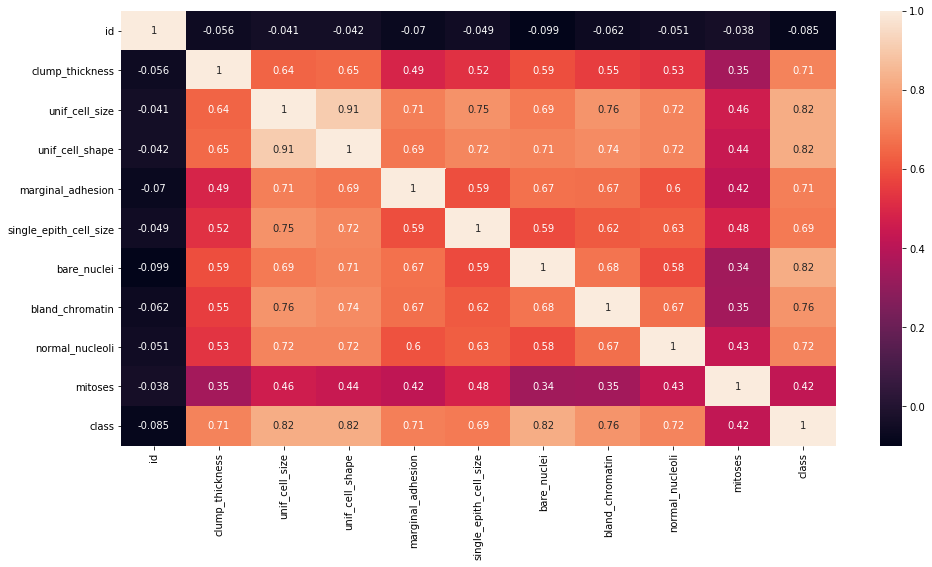

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

In [16]:
data.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [24]:
data.drop(['id'],axis=1,inplace=True)

In [25]:
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [26]:
x= data.drop(['class'],axis=1)
y = data['class']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
logit = linear_model.LogisticRegression(C=1e20)

In [29]:
logit.fit(x_train,y_train)

C:\newAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
logit.score(x_test,y_test)

0.9708029197080292

In [31]:
logit.score(x_train,y_train)

0.9706959706959707